In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_images(input_folder, output_folder, desired_height, desired_width):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Get the dimensions of the image
        height, width = image.shape[:2]

        # Calculate the cropping dimensions
        start_row = int((height - desired_height) / 2)
        end_row = start_row + desired_height
        start_col = int((width - desired_width) / 2)
        end_col = start_col + desired_width

        # Crop the image
        cropped_image = image[start_row:end_row, start_col:end_col]

        # Construct the output path
        output_path = os.path.join(output_folder, filename)

        # Save the cropped image
        cv2.imwrite(output_path, cropped_image)

        print(f'{filename} cropped and saved to {output_path}')

    print('All images cropped and saved successfully.')



In [2]:
# Example usage:
def crop(input_folder = './attachments/',
         output_folder = './objects',
         desired_height = 1062,
         desired_width = 1061):

    crop_images(input_folder, output_folder, desired_height, desired_width)

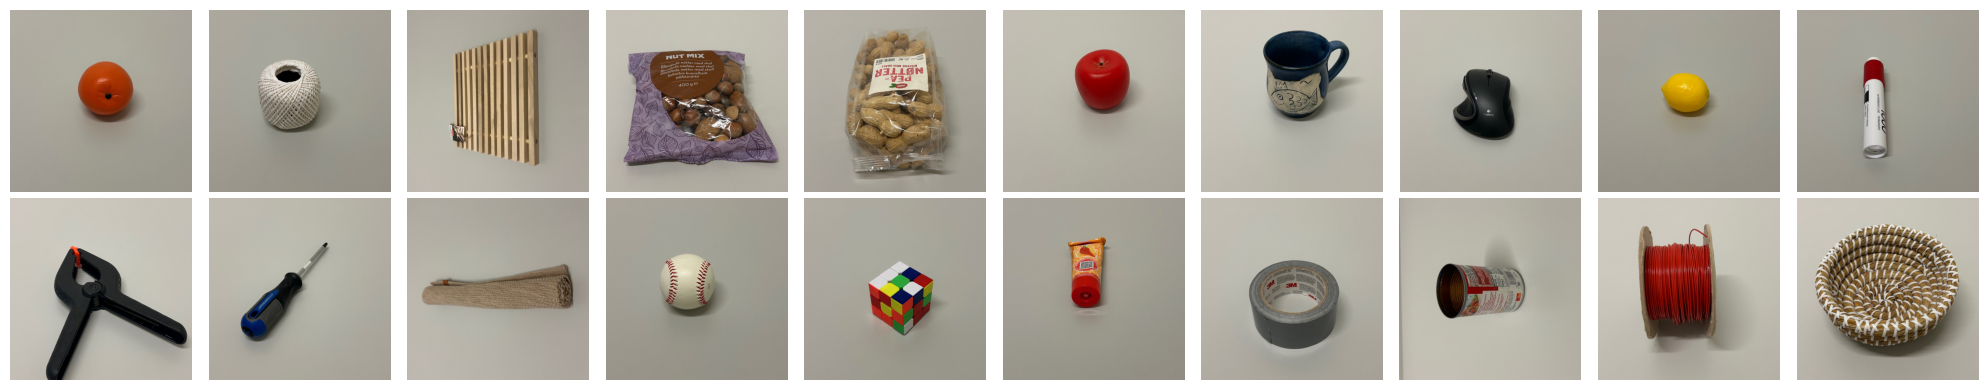

In [17]:
def plot_images(input_folder):
    # Create a figure and axis
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

    # Flatten the axes array
    axes = axes.flatten()

    # Iterate through all files in the input folder
    for i, filename in enumerate(os.listdir(input_folder)):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = plt.imread(image_path)

        # Plot the image
        axes[i].imshow(image)
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    plt.savefig('output_images_grid.pdf', bbox_inches='tight', pad_inches=0)

# Example usage:
input_folder = './objects/'
plot_images(input_folder)

In [3]:
from vit_pytorch.vivit import ViT


In [21]:
vvt_params = {
            'image_size': (240, 320),
            'image_patch_size': (40, 40),
            'num_classes': 2,
            'dim': 8,
            'spatial_depth': 2,
            'temporal_depth': 2,
            'heads': 2,
            'mlp_dim': 8
}

vvt_params['frames'] = 5
vvt_params['frame_patch_size'] = vvt_params['frames']

# Define your models
vvt_model = ViT(**vvt_params)

In [22]:
print(vvt_model)


ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (f pf) (h p1) (w p2) -> b f (h w) (p1 p2 pf c)', p1=40, p2=40, pf=5)
    (1): LayerNorm((24000,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=24000, out_features=8, bias=True)
    (3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (spatial_transformer): Transformer(
    (norm): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-1): 2 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.0, inplace=False)
          (to_qkv): Linear(in_features=8, out_features=384, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=128, out_features=8, bias=True)
            (1): Dropout(p=0.0, inplace=False)
          )
        )
        (1): FeedForward(
          (net): Sequentia

In [4]:
import seaborn as sns
import json

# Set font properties
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")


def stack_frames(video_path, offset):
    # Read the video
    cap = cv2.VideoCapture(video_path)

    # Initialize an empty list to store frames
    frames = []

    # Read frames from the video
    while(cap.isOpened()):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    
    # Close the video file
    cap.release()

    # Stack frames with offset
    stacked_frame = np.hstack([frame[offset:, :, :] for frame in frames])

    return stacked_frame

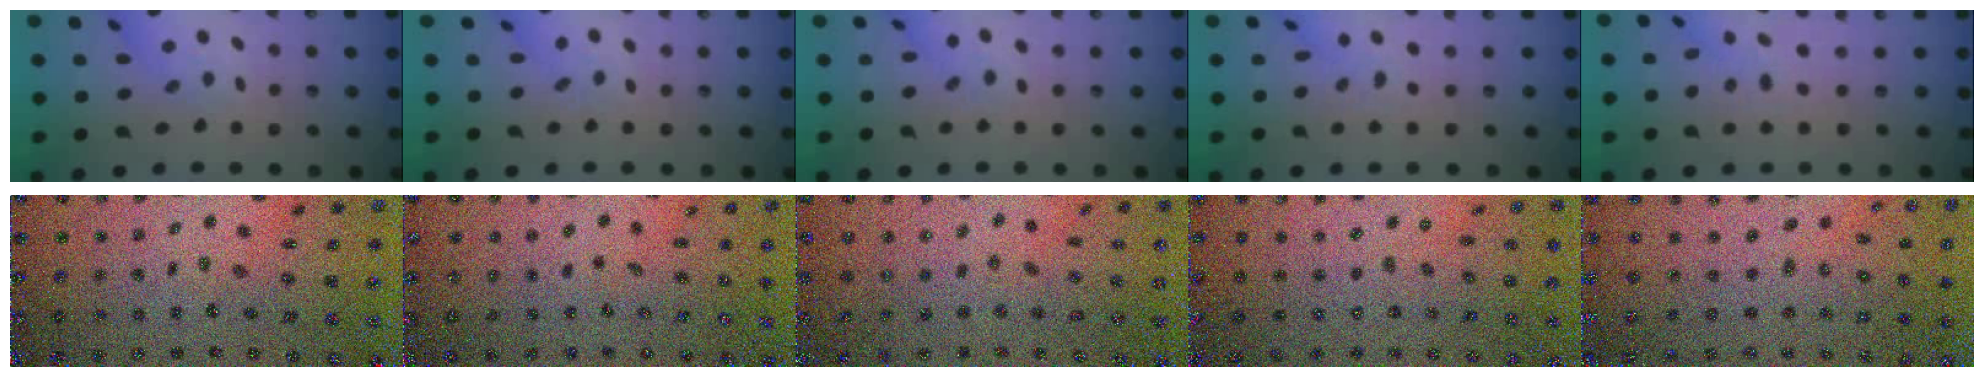

In [7]:
# Define the video paths and offsets
video_paths = ['46.avi', 'aug_46.avi']
offset = 100  # Adjust the offset as needed

# Stack frames for each video
stacked_frames = []
for video_path in video_paths:
    stacked_frame = stack_frames(video_path, offset)
    stacked_frames.append(stacked_frame)

# Stack the resulting frames vertically using matplotlib
fig, axes = plt.subplots(len(stacked_frames), 1, figsize=(20, 4), squeeze=False)
for ax, stacked_frame, video_path in zip(axes[:, 0], stacked_frames, video_paths):
    ax.imshow(cv2.cvtColor(stacked_frame, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    #ax.set_title(f'Stacked Frames: {video_path}')

plt.subplots_adjust(hspace=0.1)  # Adjust the vertical spacing between subplots
plt.tight_layout()
#plt.savefig('transformed_data.pdf', bbox_inches='tight', pad_inches=0)

plt.show()